### ✅ Overview

🔹 The goal of this explanation is to show different ways to create state schemas using:

•	TypedDict

•	dataclass

🔹 These are used when building workflows with tools like LangGraph, where states hold values that are updated 

as nodes (functions) run.

🧩 What is a State Schema?

➤ A state is like a data container that holds values such as user input or current game choice.

➤ The state is passed through the nodes, and gets updated as each node executes.

➤ You can define this schema in different ways, two of them being:

•	✅ Using TypedDict (from typing_extensions)

•	✅ Using dataclass (from dataclasses)


### 🧠 What is TypedDict?

TypedDict is used to define a dictionary-like structure where you can specify key names and their expected data types.

Comes from typing_extensions.

These are type hints, not enforced at runtime.

✅ Used for better code readability, IDE support, and type-checking tools.

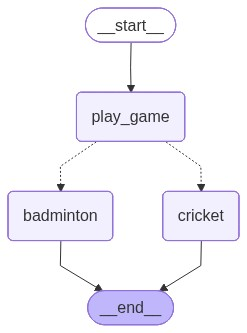

In [ ]:
# Dataclass State Schema using TypedDict

# ✅ 1. Import necessary modules
from typing_extensions import TypedDict
from typing import Literal
# ✅ TypedDict helps define a structure for state.
# ✅ Literal is used to restrict a value to specific constants.

# ✅ 2. Define the state using TypedDict
class TypedDictState(TypedDict):
    name: str
    game: Literal["cricket", "badminton"]
# 🎯 This is our state schema.
# name: can only be a str.
# game: can only be "cricket" or "badminton".

# ✅ 3. Define your node functions
# These are functions that will be part of the graph.

def play_game(state: TypedDictState):
    print("Play game node has been called")
    return {
        "name": state["name"],
        "message": f"{state['name']} wants to play" # Apoorv want to play
    }
# 🟩 cricket node
def cricket(state: TypedDictState):
    print("Cricket node has been called")
    return {"game": "cricket"}
# 🟩 badminton node
def badminton(state: TypedDict):
    print("Badminton node has been called")
    return {"game": "badminton"}

# ✅ 4. Decision node: decide_play
import random

def decide_play(state: TypedDictState) -> Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"
# ✅ Randomly decides which game to play.
# 🎯 Returns either "cricket" or "badminton".

# ✅ 5. Create the Graph
# from some_module import StateGraph, START, END
from langgraph.graph import StateGraph, START, END
from IPython.display import display,Image
builder = StateGraph(TypedDictState)

builder.add_node("play_game", play_game)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

builder.add_edge(START, "play_game")
builder.add_conditional_edges("play_game", decide_play, {
    "cricket": "cricket",
    "badminton": "badminton"
})
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

graph = builder.compile()
# ✅ We create a graph with 3 nodes.
# ✅ Add conditional flow after play_game.
# ✅ End the flow after cricket or badminton.

# View the graph
display(Image(graph.get_graph().draw_mermaid_png()))



In [ ]:
# ✅ 6. Run the Graph
graph.invoke({"name": "Apoorv"})
# {'name': 'Apoorv', 'game': 'cricket'}

# 🎯 Even though TypedDict expects name: str, if you do:
graph.invoke({"name": 123})
# {'name': '123', 'game': 'cricket'}

# ❌ It will not raise an error unless there's string-specific operation (e.g., concatenation).
# ⚠️ TypedDict is not enforced at runtime.

Play game node has been called
Cricket node has been called
Play game node has been called
Cricket node has been called


{'name': 123, 'game': 'cricket'}

### ✅ State Schema using @dataclass
🧠 What is dataclass?

@dataclass is used to define a class for holding structured data.

Comes from dataclasses.

✅ Variables are accessed using dot notation (e.g., state.name).

❌ Still not enforced at runtime (type hints only).

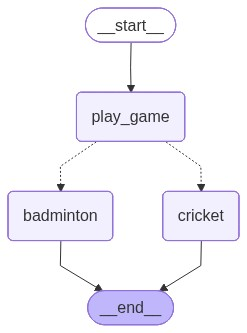

In [10]:
# ✅ Step 1: Imports
from dataclasses import dataclass
from typing import Literal
import random

# ✅ Step 2: Define the State schema using dataclass
@dataclass
class DataClassState:
    name: str
    game: Literal["cricket", "badminton"]

# ✅ Step 3: Node Functions

# Play game node
def play_game(state: DataClassState):
    print("Play game node has been called")
    return {
        "name": state.name,
        "message": f"{state.name} wants to play"
    }

# Cricket node
def cricket(state: DataClassState):
    print("Cricket node has been called")
    return {
        "game": "cricket",
        "message": f"{state.name} is playing cricket"
    }

# Badminton node
def badminton(state: DataClassState):
    print("Badminton node has been called")
    return {
        "game": "badminton",
        "message": f"{state.name} is playing badminton"
    }

# ✅ Step 4: Decision Node (Conditional Logic)
def decide_play(state: DataClassState) -> Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

# ✅ Step 5: Build the Graph

# NOTE: This part assumes you're using a stateful graph system like LangGraph or custom implementation
# Replace 'StateGraph', 'START', 'END' with your actual graph library elements
from langgraph.graph import StateGraph, START, END

# Create the graph with DataClassState
builder = StateGraph(DataClassState)

# Add nodes
builder.add_node("play_game", play_game)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

# Add edges
builder.add_edge(START, "play_game")
builder.add_conditional_edges("play_game", decide_play, {
    "cricket": "cricket",
    "badminton": "badminton"
})
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

# Compile the graph
graph = builder.compile()

# View the graph
display(Image(graph.get_graph().draw_mermaid_png()))





In [ ]:
# ✅ Step 6: Run the Graph

# Option 1: Run with cricket
print("\n--- Run 1: With game='cricket' ---")
output = graph.invoke(DataClassState(name="Apoorv", game="cricket"))
print(output)

# --- Run 1: With game='cricket' ---
# Play game node has been called
# Badminton node has been called
# {'name': 'Apoorv', 'game': 'badminton'}

# Option 2: Run with random game selection
print("\n--- Run 2: Random game selection ---")
output = graph.invoke(DataClassState(name="Apoorv", game="badminton"))  # game gets overwritten
print(output)
# --- Run 2: Random game selection ---
# Play game node has been called
# Cricket node has been called
# {'name': 'Apoorv', 'game': 'cricket'}

# Option 3: Invalid type (runtime type not enforced)
print("\n--- Run 3: Invalid name (int) ---")
output = graph.invoke(DataClassState(name=123, game="cricket"))
print(output)
# --- Run 3: Invalid name (int) ---
# Play game node has been called
# Cricket node has been called
# {'name': 123, 'game': 'cricket'}


--- Run 3: Invalid name (int) ---
Play game node has been called
Cricket node has been called
{'name': 123, 'game': 'cricket'}
